## OBJECTIVES

- Predict CVD and cancer caused mortality rates in England using air quality data available from Copernicus Atmosphere Monitoring Service
- The goal is to predict mortality rates (number of deaths per 100,000 people) for each English region using daily average measurements of ozone (O3), nitrogen dioxide (NO2), PM10 (particulate matter with diameter less than or equal to 10 micrometers), PM2.5 (diameter 2.5 micrometers or less) and temperature, data freely available from Copernicus Atmosphere Monitoring Service.

Poor air quality is a significant public health issue. The burden of particulate air pollution in the UK in 2008 was estimated to be equivalent to nearly 29,000 deaths at typical ages and an associated loss of population life of 340,000 life years lost.

In [53]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#loading data

train  = pd.read_csv("../data_clean/health_ML/train.csv")
test = pd.read_csv("../data_clean/health_ML/test.csv")
print(test)
print(train)

         Id     region        date      O3    PM10    PM25     NO2      T2M
0     18404  E12000006  2012-05-28  75.980  20.876  19.123   9.713  290.787
1     18405  E12000006  2012-05-29  73.084  21.660  17.794   8.417  288.474
2     18406  E12000006  2012-05-30  59.350  21.925  17.699  10.878  289.889
3     18407  E12000006  2012-05-31  45.991  14.549  11.386  10.302  287.815
4     18408  E12000006  2012-06-01  52.210  11.208   9.545   8.598  287.627
...     ...        ...         ...     ...     ...     ...     ...      ...
7881  26285  E12000009  2014-12-27  57.951   6.422   3.683   6.082  277.350
7882  26286  E12000009  2014-12-28  41.479  14.802  10.989  14.361  275.209
7883  26287  E12000009  2014-12-29  32.742  17.722  12.177  17.386  275.772
7884  26288  E12000009  2014-12-30  39.006  16.997  10.754  15.317  276.465
7885  26289  E12000009  2014-12-31  51.444  18.538   9.248   8.701  280.509

[7886 rows x 8 columns]
          Id     region        date  mortality_rate      O3    

In [ ]:
train  = pd.read_csv("../data_clean/train.csv")
test = pd.read_csv("../data_clean/test.csv")

In [2]:
#let's review our main dataset
train.info()

# RESULT: the train data has 18403 rows and 9 columns. 
# Out of these 9 columns, 6 have float64 class, 1 data object, 1 integer and 1 object
# *we can do a similar check for test data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18403 entries, 0 to 18402
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              18403 non-null  int64  
 1   region          18403 non-null  object 
 2   date            18403 non-null  object 
 3   mortality_rate  18403 non-null  float64
 4   O3              18394 non-null  float64
 5   PM10            18394 non-null  float64
 6   PM25            15127 non-null  float64
 7   NO2             11833 non-null  float64
 8   T2M             18403 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


In [3]:
train.describe()

,Id,mortality_rate,O3,PM10,PM25,NO2,T2M
count,18403.000000,18403.000000,18394.000000,18394.000000,15127.000000,11833.000000,18403.000000
mean,9202.000000,1.301737,45.325857,13.712272,7.498714,12.045813,283.002235
std,5312.632838,0.304161,16.221330,7.421616,5.758357,8.296675,5.182186
min,1.000000,0.439000,0.988000,2.020000,0.904000,1.104000,265.562000
25%,4601.500000,1.102000,35.074250,8.656250,3.624000,6.056000,279.321500
50%,9202.000000,1.281000,45.836000,11.704500,5.636000,9.769000,283.270000
75%,13802.500000,1.474000,55.881000,16.589000,9.326500,15.858000,287.240500
max,18403.000000,2.841000,105.693000,60.627000,45.846000,76.765000,297.209000


In [4]:
# alternative way of checking dataset columns

print ("The train data has",train.shape)
print ("The test data has",test.shape)


The train data has (18403, 9)
The test data has (7886, 8)


In [5]:
# see what the data looks like

train.head(3000)

,Id,region,date,mortality_rate,O3,PM10,PM25,NO2,T2M
0,1,E12000001,2007-01-02,2.264,42.358,9.021,NaN,NaN,278.138
1,2,E12000001,2007-01-03,2.030,49.506,5.256,NaN,NaN,281.745
2,3,E12000001,2007-01-04,1.874,51.101,4.946,NaN,NaN,280.523
3,4,E12000001,2007-01-05,2.069,47.478,6.823,NaN,NaN,280.421
4,5,E12000001,2007-01-06,1.913,45.226,7.532,NaN,NaN,278.961
...,...,...,...,...,...,...,...,...,...
2995,2996,E12000009,2007-03-26,1.528,41.161,34.624,NaN,NaN,282.409
2996,2997,E12000009,2007-03-27,1.934,44.191,39.707,NaN,NaN,282.841
2997,2998,E12000009,2007-03-28,1.334,53.291,49.294,NaN,NaN,281.632
2998,2999,E12000009,2007-03-29,1.644,72.903,10.882,NaN,NaN,279.672


In [6]:
train.shape[0]

18403

In [7]:
# check if we have missing values in our data

nans = train.shape[0] - train.dropna().shape[0]
print ("%d rows have missing values in the train data" %nans)

nand = test.shape[0] - test.dropna().shape[0]
print ("%d rows have missing values in the test data" %nand)

6570 rows have missing values in the train data
0 rows have missing values in the test data


In [8]:
# Now let's check which columns have missing values
train.isnull().sum()

Id                   0
region               0
date                 0
mortality_rate       0
O3                   9
PM10                 9
PM25              3276
NO2               6570
T2M                  0
dtype: int64

In [9]:
# How many unique values does each column hold
categories = train.select_dtypes(include=['O'])

categories.apply(pd.Series.nunique)

region       9
date      2191
dtype: int64

#### Dealing with missing values

 - we identified that we had four columns where some values were missing
 - these columns affect our records, but we don't want to scap or lose them completely!
 - Let's impute these missing values with respective models
 - O3, PM10 - we imputed missing values using mean. 
 - PM25 and NO2 have a larger number of missing values. We don't want to  remove rows with missing data because we would loose data for all 2007 and 2008 . We will calculate mean for each month in the following years

In [7]:
df = train['date']
df

0        2007-01-02
1        2007-01-03
2        2007-01-04
3        2007-01-05
4        2007-01-06
            ...    
18398    2012-05-23
18399    2012-05-24
18400    2012-05-25
18401    2012-05-26
18402    2012-05-27
Name: date, Length: 18403, dtype: object

In [8]:
#Convert date to date object
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

#Group the data by month and calculate the average pollutant concentration for each month during 2008-2012.
relevant_years_PM25 = train[(train['date'].dt.year >= 2008) & (train['date'].dt.year <= 2012)]
pm25_monthly_avg = relevant_years_PM25.groupby(relevant_years_PM25['date'].dt.month)['PM25'].mean().round(3)
# print('PM25', pm25_monthly_avg)

# impute missing values accordingly to avg for each month in 2007 

for index, row in train.iterrows():
    if pd.isnull(row['PM25']) and row['date'].year == 2007:
        month = row['date'].month
        train.at[index, 'PM25'] = pm25_monthly_avg[month]

# print(train['PM25'])

relevant_years_NO2 = train[(train['date'].dt.year >= 2009) & (train['date'].dt.year <= 2012)]
no2_monthly_avg = relevant_years_NO2.groupby(relevant_years_NO2['date'].dt.month)['NO2'].mean().round(3)
# print('no2',no2_monthly_avg)

# Check if PM25 values were imputed
print("Missing PM25 values after imputation for 2007:")
print(train[train['date'].dt.year == 2007]['PM25'].isnull().sum())

# impute missing values accordingly to avg for each month in 2007 and 2008

for index, row in train.iterrows():
    if pd.isnull(row['NO2']) and row['date'].year in [2007,2008]:
        month = row['date'].month
        train.at[index, 'NO2'] = no2_monthly_avg[month]

# Check if NO2 values were imputed
print("Missing NO2 values after imputation for 2007 and 2008:")
print(train[(train['date'].dt.year == 2007) | (train['date'].dt.year == 2008)]['NO2'].isnull().sum())

# Final check for missing data
print("Missing values after imputation:")
print(train.isnull().sum())

Missing PM25 values after imputation for 2007:
0
Missing NO2 values after imputation for 2007 and 2008:
0
Missing values after imputation:
Id                0
region            0
date              0
mortality_rate    0
O3                9
PM10              9
PM25              0
NO2               0
T2M               0
dtype: int64


In [9]:
# Calculate mean for O3, PM10

mean_O3 = train['O3'].mean()

print(mean_O3)

mean_PM10 = train['PM10'].mean()

print(mean_PM10)


# Impute those values 

train.value_counts('O3', sort= True)
train.fillna({'O3':mean_O3}, inplace= True)

train.value_counts('PM10', sort=True)
train.fillna({'PM10':mean_PM10}, inplace=True)

# Final check for missing data
print("Missing values after imputation:")
print(train.isnull().sum())


45.325857290420785
13.712272153963248
Missing values after imputation:
Id                0
region            0
date              0
mortality_rate    0
O3                0
PM10              0
PM25              0
NO2               0
T2M               0
dtype: int64


In [11]:
train.shape[0]

18403

In [17]:
train.isnull().sum()

Id                0
region            0
date              0
mortality_rate    0
O3                0
PM10              0
PM25              0
NO2               0
T2M               0
dtype: int64

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18403 entries, 0 to 18402
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              18403 non-null  int64         
 1   region          18403 non-null  object        
 2   date            18403 non-null  datetime64[ns]
 3   mortality_rate  18403 non-null  float64       
 4   O3              18403 non-null  float64       
 5   PM10            18403 non-null  float64       
 6   PM25            18403 non-null  float64       
 7   NO2             18403 non-null  float64       
 8   T2M             18403 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 1.3+ MB


In [23]:
train.mortality_rate.unique()

array([2.264, 2.03 , 1.874, ..., 1.659, 1.591, 1.253])

In [21]:
train.mortality_rate.value_counts()

mortality_rate
1.294    72
1.154    71
1.339    70
1.353    69
1.383    67
         ..
2.038     1
2.220     1
0.779     1
1.728     1
1.658     1
Name: count, Length: 1418, dtype: int64

In [30]:
#convert region and date object into a number 
#I used one-hot encoding 
#transform the data into two dimensions using a sine and cosine transformation.. Map each cyclical variable onto a circle such that the lowest value for that variable appears right next to the largest value. We compute the x- and y- components of that point using sin and cos trigonometric functions.
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col] / max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col] / max_val)
    return data

def createCopy(raw):
    df = raw.copy()

    #add new column with region indicator
    hot_region = pd.get_dummies(df['region'])
    df = df.join(hot_region)
    #get year, month, day, day of the week

    df['month'] = df['date'].dt.month
    df = encode(df, 'month', 12)
    df['day'] = df['date'].dt.day
    df = encode(df, 'day', 31)

    return df.dropna()

train = pd.read_csv('../data_clean/health_ML/train.csv', parse_dates=['date'], index_col='Id')
test = pd.read_csv('../data_clean/health_ML/test.csv', parse_dates=['date'], index_col='Id')

createCopy(train).to_csv('../data_clean/train_pp.csv')
createCopy(test).to_csv('../data_clean/test_pp.csv')


   
    


In [36]:
train_pp  = pd.read_csv("../data_clean/train_pp.csv")
test_pp = pd.read_csv("../data_clean/test_pp.csv")

In [42]:
train_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11833 entries, 0 to 11832
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              11833 non-null  int64  
 1   region          11833 non-null  object 
 2   date            11833 non-null  object 
 3   mortality_rate  11833 non-null  float64
 4   O3              11833 non-null  float64
 5   PM10            11833 non-null  float64
 6   PM25            11833 non-null  float64
 7   NO2             11833 non-null  float64
 8   T2M             11833 non-null  float64
 9   E12000001       11833 non-null  bool   
 10  E12000002       11833 non-null  bool   
 11  E12000003       11833 non-null  bool   
 12  E12000004       11833 non-null  bool   
 13  E12000005       11833 non-null  bool   
 14  E12000006       11833 non-null  bool   
 15  E12000007       11833 non-null  bool   
 16  E12000008       11833 non-null  bool   
 17  E12000009       11833 non-null 

In [43]:
X = train_pp[['O3', 'PM10', 'PM25', 'NO2', 'T2M', 'month_sin', 'month_cos', 'day_sin', 'day_cos']]
y = train_pp['mortality_rate']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [48]:
#mortality rate on the test data
y_pred = model.predict(X_test)

# evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.051496557508784055


In [49]:
train_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11833 entries, 0 to 11832
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              11833 non-null  int64  
 1   region          11833 non-null  object 
 2   date            11833 non-null  object 
 3   mortality_rate  11833 non-null  float64
 4   O3              11833 non-null  float64
 5   PM10            11833 non-null  float64
 6   PM25            11833 non-null  float64
 7   NO2             11833 non-null  float64
 8   T2M             11833 non-null  float64
 9   E12000001       11833 non-null  bool   
 10  E12000002       11833 non-null  bool   
 11  E12000003       11833 non-null  bool   
 12  E12000004       11833 non-null  bool   
 13  E12000005       11833 non-null  bool   
 14  E12000006       11833 non-null  bool   
 15  E12000007       11833 non-null  bool   
 16  E12000008       11833 non-null  bool   
 17  E12000009       11833 non-null 

<Axes: >

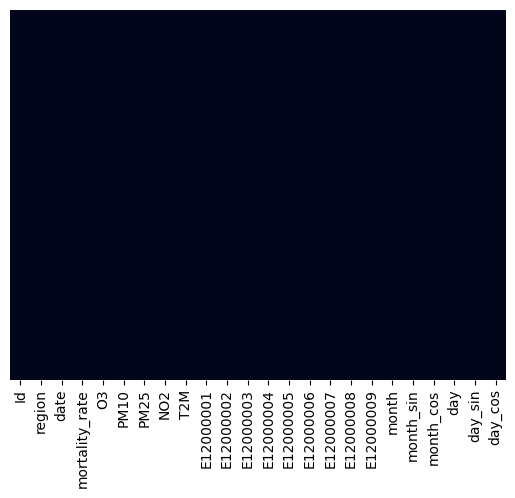

In [54]:
sns.heatmap(train_pp.isnull(),cbar=False,yticklabels=False)

In [51]:
correlation_matrix = train_pp[['mortality_rate', 'O3', 'PM10', 'PM25', 'NO2', 'T2M']].corr()
correlation_matrix

,mortality_rate,O3,PM10,PM25,NO2,T2M
mortality_rate,1.000000,-0.084773,-0.057218,-0.063441,-0.074510,-0.511774
O3,-0.084773,1.000000,-0.226175,-0.194535,-0.680321,0.350248
PM10,-0.057218,-0.226175,1.000000,0.912956,0.600220,-0.075898
PM25,-0.063441,-0.194535,0.912956,1.000000,0.570076,-0.079449
NO2,-0.074510,-0.680321,0.600220,0.570076,1.000000,-0.340037
T2M,-0.511774,0.350248,-0.075898,-0.079449,-0.340037,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

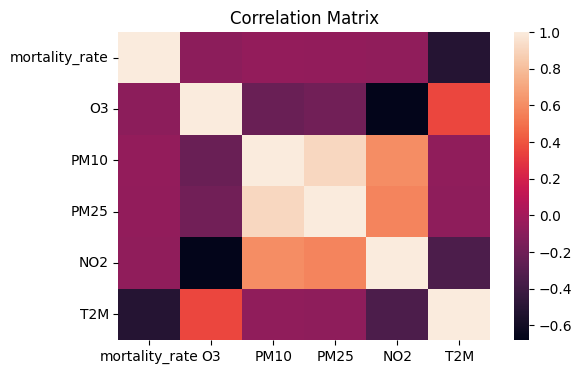

In [59]:
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix,annot=False) 
plt.title('Correlation Matrix')

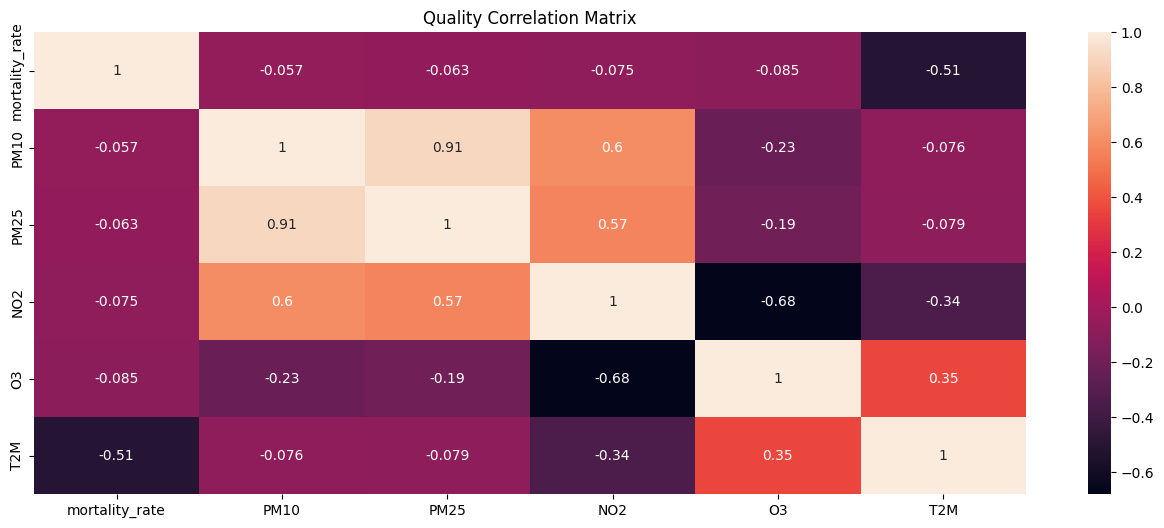

In [61]:
#Quality correlation matrix

k = 12  # number of variables for heatmap
cols = correlation_matrix.nlargest(k, 'mortality_rate')['mortality_rate'].index
cm = train_pp[cols].corr()

plt.figure(figsize=(16, 6))
sns.heatmap(cm, annot=True)
plt.title('Quality Correlation Matrix')
plt.show()



### FINDINGS: 

Our Linear Model is making relatively accurate predictions for the mortality rates. 

__out of 75% people with <=50K salary:__ 

- 27% people are high school graduates, which is correct as people with lower levels of education are expected to earn less. 

__out of 25% people with >=50K salary:__ 

- 6% are bachelors and 5% are high-school grads. ==> _this pattern seems to be a matter of concern! We have to consider more variables before coming to a conclusion._


